# Final Exam {-}

**Notes:**

1. You have 3 hours to do the exam.  Your solution must be uploaded to Canvas (exactly as is done for the prelabs and labs) as a notebook file with its name unchanged. **Late exams will not be accepted.**   A little bit of extra time has been allotted on Canvas for you to turn it in before it will claim the exam is late. This is meant to insure that you have a full 3 hours to work on the exam, and then a little bit of time to turn in it. It is not extra time to work on the exam!
2. You must work on the exam yourself.  It must all be your work.  You are free to use whatever resources you wish except other people.  I am trying to be flexible in terms of when people can work on this portion of the exam.  This means different students will be working on the exam at different times.  **Do not discuss the exam with other students until everyone has completed it.**
3. The exam is meant to be completed in the allotted time.  I may have misjudged the amount of time the questions will take.  Keep in mind that everyone is in the same situation as yourself.  If the exam is too long everyone will suffer similarly and I will take that into account when assigning grades.  It is best to look at all the problems and do as much work as you can starting with the problem you are most comfortable with.
4. The points for each problem is given below.  You can use this information to decide how to apportion your time working on the problems.
5. When I ask for descriptions include all the information you think is relevant to convince me that (a) you know how to solve the problem, and (b) can be used to reproduce the results if someone else in the class were given the description.  The more clear these descriptions are the better chance I have in understanding what you have done and assigning partial credit. When making nice plots you must follow all the good practices discussed and used in the labs.
6. **Read the questions carefully.** There is important information given in various places in various parts of the problem.  Do not skip reading sections, even if they are very small.

## Initialization {-}

Collect all your initialization here.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
import scipy.integrate as integ
import scipy.interpolate as interp
import scipy.linalg as la
import scipy.special as sf
import urllib.request
%matplotlib inline
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
mpl.rc ('font', family = 'monospace')
rng = np.random.default_rng()

# Sophomore's Dream (10 points)

One of the two identities often referred to as the sophomore's dream is
$$ \int_{0}^{1} x^{-x} \,\mathrm{d}x = \sum_{n=1}^\infty n^{-n}. $$
It is a dream because it seems too good to be true!

Although it is fun to verify this identity analytically, here we will do so numerically.

Evaluate the integral and sum numerically. Of course the sum will be done *without using a loop*. Print the values for both and the absolute difference between the two values. Use enough terms in the sum to ensure that the values agree to at least 5 digits. (You do not need to find a precise number of terms, just use enough!)

In [35]:
int_sol = integ.quad(lambda x: (x**(-x)), 0, 1)[0]

def sum_method(n):
    """
    computes summation for n^-n funtion for enterd number of terms
    """
    n_array = np.linspace(1,n,n)
    sol = np.zeros(n)
    sol = n_array**(-n_array)
    return np.sum(sol)

sum_sol = sum_method(10)
diff = np.abs(int_sol-sum_sol)
print(f"""Numerical Int Value = {int_sol}
Numerical Sum Value = {sum_sol}
Absolute Difference = {diff}""")

Numerical Int Value = 1.2912859970626636
Numerical Sum Value = 1.2912859970590431
Absolute Difference = 3.6204372833026355e-12


# A Game of Tag (35 points)

Here we will consider a very simple game of tag consisting of a pursuer, $\vec{P}(t)$, and an evader, $\vec{E}(t)$. We will work in two dimensions so that their positions are represented as
$$ 
\vec{P}(t) = \begin{pmatrix} x_p(t) \\ y_p(t) \end{pmatrix}
\quad\mathrm{and}\quad
\vec{E}(t) = \begin{pmatrix} x_e(t) \\ y_e(t) \end{pmatrix}.
$$

We will assume the following.

1. The evader follows a predetermined path, meaning that $\vec{E}(t)$ will be a known function.
2. The pursuer will always head directly toward the evader at each time, $t$.
3. The pursuer's speed is proportional to the evader's speed.

The final two assumptions mean that the velocity of the pursuer is
$$ \frac{\mathrm{d} \vec{P}(t)}{\mathrm{d}t}
=
k \left| \frac{\mathrm{d} \vec{E}(t)}{\mathrm{d}t} \right| \frac{\vec{E}(t) - \vec{P}(t)}{\left| \vec{E}(t) - \vec{P}(t) \right|}, $$
where $k$ is the velocity proportionality constant.

This is an equation we can solve to find the pursuer's position, $\vec{P}(t)$.

To prepare for finding a solution, write a function that will be passed to `solve_ivp` of the form
```
def tag_ode(t, y, k, evader, vevader):
```
Here the extra arguments are
1. `k`: velocity proportionality constant,
2. `evader`: a function that will be called as `evader(t)` and returns a NumPy array containing the $x$ and $y$ position of the evader at time $t$,
3. `vevader`: a function that will be called as `vevader(t)` and returns a NumPy array containing the $x$ and $y$ components of the velocity of the evader at time $t$.

We will write the functions `evader` and `vevader` below, but these functions **need not be vectorized**. (At least if we write them in the simplest ways, they will not be vectorized, and that is acceptable for this exam.) This means that `tag_ode` will also not be vectorized and we will not be able to call it with an array of times.

In [10]:
def tag_ode(t, y, k, evader, vevader):
    """
    Params
    -------
    k: velocity p const
    evader: a ffunction that rerts positin of evasder
    vevader the vel of evadr
    """
    dydt = np.zeros(3)
    dydt[0] = y[0]
    dydt[1] = k*np.abs(vevader(t))*(evader(t)-y)/(np.abs(evader(t)-y))
    return dydt
    
    dydt = np.zeros_like(y)
    dydy[0] = y #assuming y is position
    dydt[1] = k*np.abs(vevader(t))*(evader(t)- y)/(np.abs(evader(t)- y))
    return dydt


## Test Case

As a simple test of our code we will first consider an evader who uses a simple strategy, they run in a straight line at a constant speed. Let
$$ \vec{E}(t) = \begin{pmatrix} 0 \\ 5 t \end{pmatrix}. $$

Write the functions `evader1` and `vevader1` below for the position and velocity of the evader, respectively. Since we can calculate the velocity analytically, we will!

In [4]:
def evader1(t):
    x = 0
    y = 5*t
    pos = np.array(x,y)
    return pos

def vevader1(t):
    dx = o
    dy = 5
    vel = np.array(dx,dy)
    return vel

### Tagged

The evader will be "tagged" when the separation between the pursuer and evader first reaches 0.1 (in the arbitrary units we are using). Ultimately we want to accurately solve for the time when the evader is tagged. As a first step, we need to solve the differential equation for the position of the pursuer, $\vec{P}(t)$.

### Paths

Solving this ODE is a bit more subtle than it may appear. The main issue is that we do not know the time when the tag will be applied, thus we do not know what maximum time to use. We cannot just use an arbitrarly large time! If we try this, the code will run for a very, very long time. We can understand this since around the time that the separation between the pursuer and evader goes to zero, the direction of the velocity of the pursuer changes rapidly. (Imagine being just to left of the evader at one time and just to the right at a short time later, the velocity needs to flip $180^\circ$ very quickly.) There are a number of ways to overcome this. Here are a couple of options.

1. Use the `events` mechanism in `solve_ivp`. By far this is the easiest, once we know how to use it. With this we can use a "large" time, as long as we have `solve_ivp` terminate the first time our desired condition is satisfied.
2. We can carefully approach the tag time. To do this we should probably first solve the ODE at low tolerances so that `solve_ivp` does not try too hard. We should be prepared to interupt the kernel when it starts taking too long to find a solution. As we hone in on a usable time (long enough to reach the tag time, but not too long such that the pursuer collides with the evader), we can then make the tolerances tighter for the final solution.

In both cases we are going to need to calculate the distance between the pursuer and evader. Since we are not enforcing our functions to be vectorized, the one place where it will be acceptable to use a loop is in the evaluation of `evader(t)` when we are making a plot (and perhaps when we find the separation distance).

Consider the conditions
$$ k = 1.5 \quad \mathrm{and} \quad \vec{P}(0) = \begin{pmatrix} 2 \\ 3 \end{pmatrix}. $$
Find a solution for the position of the pursuer, $\vec{P}(t)$. Assign the return value of `solve_ivp` to the variable `sol1`, since we use it below. 
Produce a plot of the $y$ versus $x$ position of both the pursuer and evader (in one plot).

### Tag Time

Given our solution to the ODE we can determine the time at which the tag occurs. Write the function
```
def tag_time(sol, evader):
```
that will return this time.

Here `sol` represents the solution returned by `solve_ivp` and `evader` is the function that determines the position of the evader as a function of time.

If you used `events`, then this is simple as `sol` already contains the answer! If not, then you must *accurately* determine the tag time. Independent of the method used, we want the tag time accurate at least 1 part in $10^5$.

In [6]:
def tag_time(sol, evader):
    """
    
    """
    return sol.t_events

Run this cell to print the time. This assumes the solution is called `sol1`, as directed above.

In [7]:
# Run this cell as is.
print("Tag time =", tag_time(sol1, evader1))


AttributeError: 'float' object has no attribute 't_events'

## Better Evader

Now that we have a working code for a simple strategy, repeat the above for a more interesting evasion strategy. Suppose the evader follows the path
$$ \vec{E}(t) = \begin{pmatrix}
5 + \cos(2\pi t) + 2 \sin(4\pi t) \\
4 + 3 \cos(3\pi t)
\end{pmatrix}. $$

Once again define functions for the position of the evader, `evader2`, and the velocity of the evader `vevader2`. Use your `tag_ode` from above to solve for the position of the pursuer, called `sol2`, with the conditions
$$ k = 1.02 \quad \mathrm{and} \quad \vec{P}(0) = \begin{pmatrix} 2 \\ 7 \end{pmatrix}. $$
Again produce a plot of the paths of both the pursuer and evader.

In [ ]:
def evader2(t):

def vevader2(t):


Once again, run this cell to print the time. This assumes the solution is called `sol2`, as directed above.

In [ ]:
# Run this cell as is.
print("Tag time =", tag_time(sol2, evader2))


# Particle Resonances (20 points)

Most particles produced in accelerators are unstable and decay with lifetimes (often much) less than $10^{-10}$ seconds. Given this, how can we identify that there was a particle at all? The way this is done is through resonances. This was first observered in pion-nucleon scattering. The cross section for this showed a large peak and was called the $\Delta$ resonance. Resonances have since been used to detect almost all of the known particles, culminating in the discovery of the Higgs boson (04 July 2012).

To study how to extract information from a resonance, sample [resonance data](https://raw.githubusercontent.com/cwru-phys-250/p250-spring-2022/main/data/resonance.dat)
can be read from the url provided below.

This data file contains three columns:

1. Energy (arbitrary units),
2. Counts,
3. Uncertainty in the counts.

Read in this data file and produce a plot of the data with error bars.

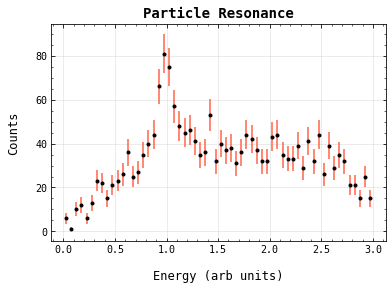

In [11]:
url = "https://raw.githubusercontent.com/cwru-phys-250/p250-spring-2022/main/data/resonance.dat"
with urllib.request.urlopen(url) as fp :
    (E, Co, U) = np.loadtxt(fp, usecols=(0,1,2), unpack=True)


The data should look like a resonance peak on top of background. We can model both of these and use the data to extract information about the mass and width of the resonance. 

The resonance is typically represented by the Breit-Wigner form
$$ BW(E) = \frac{1}{2\pi} \frac{I \Gamma}{(E-M)^2 + 0.24 \Gamma^2}. $$
Here $I$ is a normalization, $M$ is the mass of the resonance, and $\Gamma$ is the width (strictly speaking the FWHM) of the peak. (Note that this is also called a Lorentzian and is part of the Voigt profile encountered on the Midterm exam.)

Real observations have background. Here we can model it as a quadratic polynomial
$$ b(E) = b_0 + b_1 E + b_2 E^2. $$

Define functions for the Breit-Wigner form, the background, and the total model (the sum of the two contributions), as outlined below. We will use these functions in our final figure.

In [12]:
def BW(E, I, M, Gamma):
    """
    resonance represented in Breit-Wigner form
    params:
    -------
    E : energy
    I : normalization
    M : mass of resonance
    Gamma : width (FWHM) of peak
    """
    ans = (1/2*np.pi)*(I*Gamma)/((E-M)**2+0.24*Gamma**2)
    return ans

def background(E, b0, b1, b2):
    """
    background of the real observation modeled with a quadratic polynomial
    params:
    -------
    E : energy
    b0 : model constant
    b1 : model constant
    b2 : model constant
    """
    ans = b0 + b1*E + b2*E**2
    return ans

def counts_model(E, b0, b1, b2, I, M, Gamma):
    """
    Summation of the background and resonances to give a full model
    params:
    -------
    E : energy
    I : normalization
    M : mass of resonance
    Gamma : width (FWHM) of peak
    b0 : background model constant
    b1 : background model constant
    b2 : background model constant
    """
    ans = background(E, b0, b1, b2) + BW(E, I, M, Gamma)
    return ans


Perform a fit of the model to the data. Print the chi squared, number of degrees of freedom, goodness of fit, and the values and uncertainties of the best-fit parameters, all clearly identified.

thetaD = 132.32463384880506 +/- 11.628528895875734 K
chisq = 149.2767738921177
dof = 60
Q = 1.4532238115857086e-09
b0 = 132.32463384880506 +/- 11.628528895875734
b1 = -56.26499466831668 +/- 7.7397981304514225
b2 = 7.258639074077844 +/- 1.4469813754790612
I = -24.077040769022222 +/- 3.6287334424555344
M = 0.03288936751945282 +/- 0.020999889170290376
Gamma = 1.288468325937518 +/- 0.07380438503624519



Produce a nice plot of the data along with the best-fit curve. Also include in the figure the curve for just the best-fit Breit-Wigner peak and the curve for just the best-fit background.

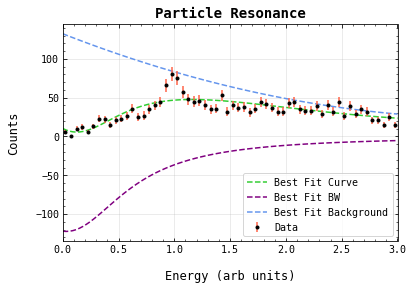

# Error Propagation (35 points)

We have learned for
$$ y = f(x_1, x_2, \ldots, x_n), $$
if each $x_i$ is a value with a Gaussian distributed uncertainty, $\sigma_i$, then we can propagate errors to calculate at $\vec{x}=\vec{x}_0$ the uncertainty in $y$ is given by
$$ \sigma_y^2 = \sum_{i=1}^n \left( \left. \frac{\partial f}{\partial x_i} \right|_{\vec{x}=\vec{x}_0} \sigma_i \right)^2. $$
While this is a nice analytic formula, for some reason when we first encounter it (probably in an introductory lab course) we do not like using it. Here we explore some alternative methods of propagating errors.

## Numerical Derivative Method

Since derivatives appear in the expression for the propagated error, we could instead take a **numerical derivative** approach. If we numerically evaluate the derivatives using center differencing with step sizes $h_i=\sigma_i$ then
\begin{align}
    \sigma_y^2 &= \sum_{i=1}^n \left[ \frac{f(x_1, x_2, \ldots, x_i+\sigma_i, \ldots, x_n) - f(x_1, x_2, \ldots, x_i-\sigma_i, \ldots, x_n)}{2\sigma_i} \right]^2 \sigma_i^2 \\
    &= \sum_{i=1}^n \left[ \frac{f(x_1, x_2, \ldots, x_i+\sigma_i, \ldots, x_n) - f(x_1, x_2, \ldots, x_i-\sigma_i, \ldots, x_n)}{2} \right]^2
\end{align}
Notice that this involves evaluating our function at shifted points in a way that has some similarities to how we have numerically evaluated the Jacobian matrix in the past.

## Monte Carlo Approach

Another option is to ignore the derivatives and the formula for propagating errors completely and instead just simulate using a **Monte Carlo** approach. Here we generate $N_{\mathrm{MC}}$ random values for each $x_i$. In the case we are considering in this problem, these are generated from Gaussian distributions with means $x_{0,i}$ and variances $\sigma_i$. The uncertainty in $y$ can then be estimated by evaluating the function, $f$, at each of these generated points and calculating the variance of these evaluations.

We will explore both of these approaches.

## Test Case

As always, it is best to start with a simple test case. Consider the function
$$ f(x_1, x_2) = \frac{x_1}{x_2} . $$

Analytically calculate the expression for $\sigma_y$ in terms of $x_i$ and $\sigma_i$ and typeset the result below.

Using

$$ \sigma_y^2 = \sum_{i=1}^n \left( \left. \frac{\partial f}{\partial x_i} \right|_{\vec{x}=\vec{x}_0} \sigma_i \right)^2. $$

for 

$$y = f(x_1,x_2)=\frac{x_1}{x_2}$$

$$\sigma_y^2 = \sum_{i=1}^2 \left(\frac{\partial f}{\partial x_i}|_{x=x_0}\sigma_i \right)^2
$$


$$\sigma_y^2 = \left(\frac{\partial f}{\partial x_1}\sigma_1 \right)^2+\left(\frac{\partial f}{\partial x_2}\sigma_2 \right)^2
$$

$$\frac{\partial f}{\partial x_1}=\frac1{x_2}
$$

$$\frac{\partial f}{\partial x_2}=-\frac{x_1}{x_2^2}
$$

$$\sigma_y = \sqrt{\left(\frac1{x_2}\sigma_1 \right)^2+\left(-\frac{x_1}{x_2^2}\sigma_2 \right)^2}
$$

For later convenience we will define the test function as below. In this function `args` contains the arguments passed in as an array. We will assume that `args[0]` refers to $x_1$ and `args[1]` refers to $x_2$. This is convenient since `args` can be a two dimensional array, i.e., it can be array with 2 rows and as many columns as we want. This will allow us to perform all of our numerical evaluations *without using loops* as we know we should. Even so, properly employing this function will require some care.

In [20]:
def test_function(args):
    """
    Function for testing error propagation.
    args is (atleast) a one dimensional array.
    """
    return args[0] / args[1]

### Numerical Derivatives

First implement a function to calculate and return $\sigma_y$ using center differencing (as described above). This function is defined as
```
def error_propagate_center_diff(f, mean, sigma):
```
where `f` is the function we want to evaluate, `mean` is an array of what we called $\vec{x}_0$ above, and `sigma` is an array of the uncertainties.

In the cell below the first two lines provided in the function ensure that `mean` and `sigma` are arrays, even if only a single numbers are passed in. This allows us to not have to treat cases where `f` is a function of only one variable separately. We will thus be able to use all the array manipulations we are familiar with (such as broadcasting) when working with `mean` and `sigma`.

In [21]:
def error_propagate_center_diff(f, mean, sigma):
    mean = np.atleast_1d(mean)
    sigma = np.atleast_1d(sigma)
    F = np.zeros_like(sigma)
    i=0
    a = (f(mean+sigma[i]) - f(mean-sigma[i])) / (2.)
    F[0] = a
    #a = np.sqrt(cd[0]**2 + cd[1]**2)
    #b = np.sqrt(cd[0]**2 *sigma[0]**2 + cd[1]**2 *sigma[1]**2)
    #c = np.sqrt(F[0]**2 + F[1]**2)
    return F[0]

mean = (2.,5.)
sigma = (.2,.45)
error_propagate_center_diff(test, mean, sigma)


In [ ]:
def error_propagate_center_diff(f, mean, sigma):
    mean = np.atleast_1d(mean)
    sigma = np.atleast_1d(sigma)
    cd1 = (f(mean+sigma[0]) - f(mean-sigma[0])) / (2.)
    cd2 = (f(mean+sigma[1]) - f(mean-sigma[1])) / (2.)
    #a = np.sqrt(cd[0]**2 + cd[1]**2)
    #b = np.sqrt(cd[0]**2 *sigma[0]**2 + cd[1]**2 *sigma[1]**2)
    c = np.sqrt(cd1**2 + cd2**2)
    return c

mean = (2,5)
sigma = (.2,.45)
error_propagate_center_diff(test, mean, sigma)


### Monte Carlo

Next implement the Monte Carlo approach. We again ensure that `mean` and `sigma` are arrays in this function. Additionally we pass in our random number generator `rng` and the number of realizations we want to use `Nmc`.

Since this function *will not use loops* we should keep in mind how we call the function `f`: it expects its arguments to be an array of size $N\times N_{\mathrm{MC}}$, where $N$ is the number of variables (which is 2 for our test function but will not be so in general). Also, recall that the variance, as calculated by `np.var`, is the square of the uncertainty.

In [22]:
def error_propagate_MC(f, mean, sigma, rng, Nmc):
    """
    returns the error propagated using montecarlo method
    params:
    ------
    f : function 
    mean : array of mean values
    sigma : array of sigma values
    rng : random number generator
    Nmc : number of times to run the simulation
    """
    

### Results

Consider the case where we want evaluate $\sigma_y$ for our test function when
\begin{align*}
    x_1 &= 2 \pm 0.2, \\
    x_2 &= 5 \pm 0.45.
\end{align*}

Evaluate and print the value of $\sigma_y$ found from the analytic formula you provided above, from the numerical method, and from the Monte Carlo method (using 1,000,000 samples). The analytic and numerical derivative results should be in good agreement. The Monte Carlo result should be close, but may deviate more than we would otherwise expect.

Analytic:  0.05381449618829484
Numerical: 2.25


## Larger Test

Now that we have a working test case we are not done. The previous test case was rather simple and could allow errors to slip through. (In fact, my first implementation of one of the functions did have an error which was not triggered when we only had a function of two variables!) For a larger test case we can use the Breit-Wigner function we defined in the previous problem. We *will not rewrite this function*. We can reuse the function defined above, though we do need to call it differently. Recall that we call the function we pass into the two methods we implemented above as
```
f(args)
```
where `args` is an array. This is not how we wrote our `BW` function above. That is not a problem, we can either write a simple wrapper that takes `args` as its argument and then calls the `BW` function we wrote above, or we can follow the same idea and just use a `lambda` function. In either approach, we will not rewrite the Breit-Wigner function!

Here we evaluate the uncertainty in the Breit-Wigner function for $E=1.2$ and where
\begin{align*}
    I &= 15 \pm 2, \\
    M &= 1.1 \pm 0.02, \\
    \Gamma &= 0.2\pm 0.05.
\end{align*}
You probably do not want to calculate the analytic result, so I will provide the result, if we use the standard propagation of errors formula we find $\sigma_y=5.94$.

Just like the simple test from above, calculate and print the uncertainties you find using the numerical and MC methods.

You should find both methods are similar to the quoted analytic value, though the Monte Carlo method really only agrees to about 1 digit!

Numerical: 6.281551086017994e-05


## Problematic Case

The analytic formula and its numerical derivative version are good, but there are cases where they can fail! As an example, consider the very simple function
$$ f(x) = \sin(x). $$

Suppose we want to determine the uncertainty when
$$ x = \frac{\pi}{2} \pm 0.23. $$

Explain why the analytic and numerical derivative approaches will fail in this case. Or, more to the point, will give a nonsensical result.

Run the numerical derivative method for this function and print the uncertainty it finds. This result must be consistent with your explanation above! (*Note:* Due to the way we wrote our functions, can just pass `mean` and `sigma` in as single numbers, we do not have to make them arrays.)

Numerical: [2.41352831e-16]


Now calculate and print the uncertainty using the Monte Carlo method, again with 1,000,000 samples.

### Summary

You should have found that the Monte Carlo method typically deviates from the analytic and numerical derivative methods. This is because a function of Gaussian random variables is only approximately Gaussian distributed! The analytic formula is only a good approximation when the uncertainties are small.

The Monte Carlo method calculates the correct distribution, which need not be Gaussian at all. Due to this, the single number $\sigma_y$ does not capture all the information about the shape. Instead, we should use the actual probability distribution as provided in the Monte Carlo method. In fact, this method is much more general. It can use any probability distribution for the uncertainties, it does not require $\vec{x}$ to be Gaussian distributed: we can simulate by picking variables from whatever distribution(s) the variables come from.

This can be seen in our original test function. As one example, the case
\begin{align*}
  x_1 &= 2\pm 0.2, \\
  x_2 &= 1\pm 0.25,
\end{align*}
can be considered. If you compare the results as we did in our first test and then plot the approximate Gaussian from the analytic calculation to the actual distribution from the Monte Carlo method, significant differences will be seen.

Unfortunately, we have do not have unlimited time, so we will have to save such explorations for the future.

# Turn in the Exam {-}

Turn in the exam on Canvas following the procedure used for the PreLabs and the Computational part of the Midterm Exam.